In [ ]:
#@markdown Run to install repo
import os
import sys

repo_url = "https://github.com/paulynamagana/AFDB_scripts"

repo_name = repo_url.split("/")[-1]  # Extract the repository name from the URL (after the last "/")

def find_repository(repo_name):
    """Searches the entire file system for a directory with the given name."""
    for root, dirs, files in os.walk("/"):  # Start from the root directory
        if repo_name in dirs:
            return os.path.join(root, repo_name)  # Return the full path
    return None

repo_path = find_repository(repo_name)

if repo_path:
    print(f"Found repository {repo_name} at: {repo_path}")
    %cd {repo_path}

    # (Optional) Update the repository
    !git pull  # Pull latest changes (if any)

else:
    print(f"Repository {repo_name} not found. Cloning...")
    !git clone {repo_url}
    %cd {repo_name}


sys.path.append(os.path.join("/content/", repo_name))

: 

In [8]:
import api_handler

uniprot_id = "P05067"
alphafold_data = api_handler.fetch_AFDB_data(uniprot_id)
if alphafold_data:
    am_data_url = api_handler.extract_alpha_missense_url(alphafold_data)
    pdb_data_url = api_handler.extract_pdb_url(alphafold_data)
    pae_png_url = api_handler.extract_pae_url(alphafold_data)



: 

2024-10-16 19:51:27,417 - INFO - AM data saved to: AF-P05067-F1-aa-substitutions.csv
2024-10-16 19:51:27,430 - INFO - Retrieving PDB file
2024-10-16 19:51:27,599 - INFO - Writing modified PDB data to: data_output/AM_scores_AF-P05067-F1-model_v4.pdb


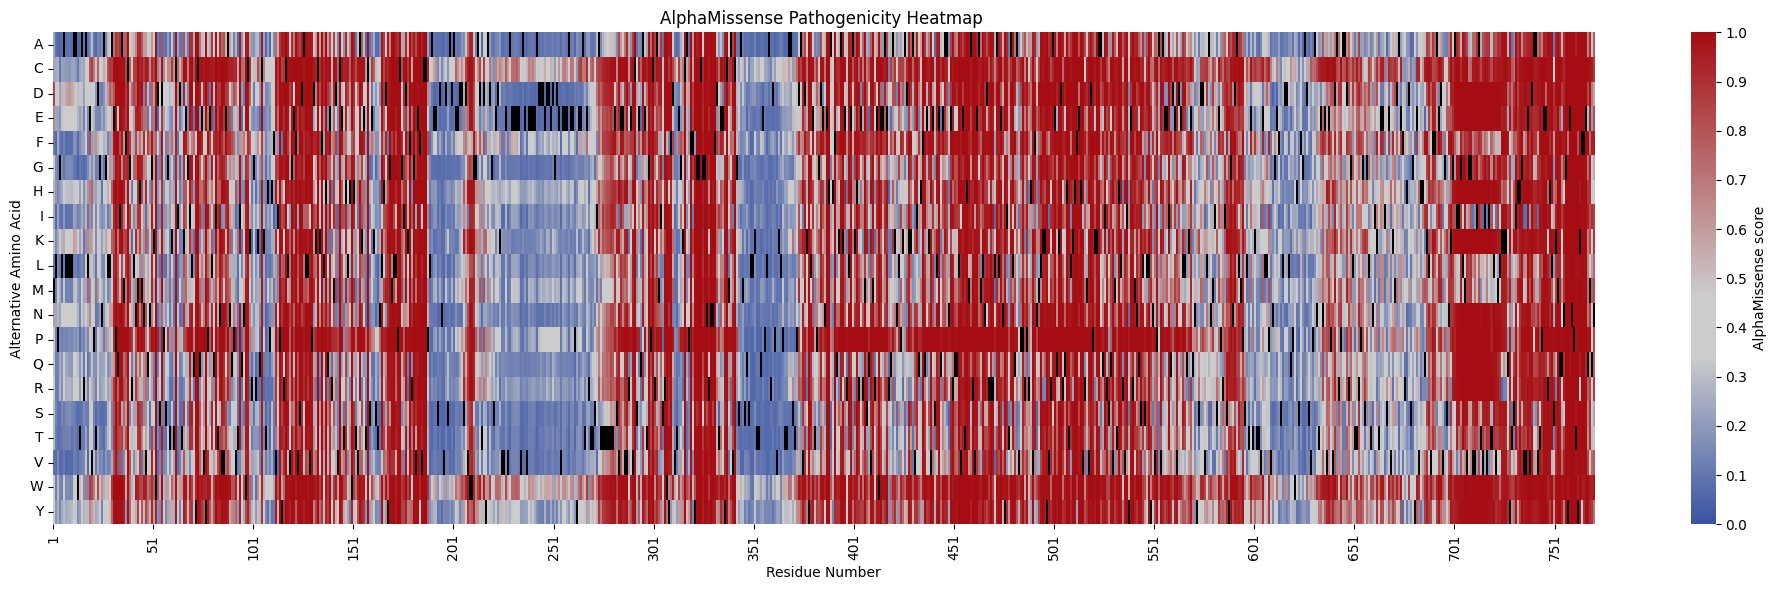

In [9]:
import AM_data_processing

am_data = AM_data_processing.extract_am_data(am_data_url)

if am_data is not None:
    average_scores = AM_data_processing.calculate_average_pathogenicity(am_data)
    AM_data_processing.modify_pdb_with_am_data(pdb_data_url, average_scores)
    AM_data_processing.plot_am_heatmap(am_data)

In [ ]:
import plots

plots.plot_scores(pathogenicity_scores, plddt_scores)

In [10]:
#@markdown visualise structure
import requests
from IPython.display import Image, display
from plots import plot_plddt_legend
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
import py3Dmol

image_url_af = "https://alphafold.ebi.ac.uk/files/AF-P05067-F1-predicted_aligned_error_v4.png"

with open(f"data_output/AM_Scores_AF-{uniprot_id}-F1-model_v4.PDB", "r") as f:
  AM_pdb = f.read()

# Fetch and display the first structure
pdb_data = requests.get(pdb_data_url).text

plddt_colors = ["#FFFFFF", "#FF7D45", "#FFFF00", "#65CBF3", "#0000FF"]
# Define the gradient colors based on the image
color_positions = [
    (0.0, '#2166AC'),   # Blue
    (0.2, '#92C5DE'),   # Light blue
    (0.36, '#D1E5F0'),  # Very light blue
    (0.45, '#A8A9AC'),  # Grey
    (0.6, '#FDDDBC'),   # Light orange
    (0.8, '#F4A582'),   # Orange
    (1.0, '#B2182B')    # Red
]
color_gradient = [color for _, color in color_positions]


# Create the view and add models
view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js', width=690, height=500, viewergrid=(2, 1), linked=True)
view.addModel(pdb_data, 'pdb')
view.addModel(AM_pdb, 'pdb')
view.setStyle({'cartoon': {'colorscheme': {'prop': 'b', 'gradient': 'linear', 'min': 0, 'max': 125, "colors": plddt_colors }}}, viewer=(0,0))
# Set the style with the custom gradient
view.setStyle({'cartoon': {'colorscheme': {
    'prop': 'b',
    'gradient': 'linear',
    'min': 0,
    'max': 120,
    'colors': color_gradient
}}}, viewer=(1,0))

view.zoomTo()
view.show()


    # Create and display the plot
fig = plot_plddt_legend()
plt.show()  # Display the plot
plt.close(fig)  # Close the figure to free up memory


image_data1 = requests.get(image_url_af).content
display(Image(data=image_data1))


: 

In [ ]:
from AM_data_processing import extract_pathogenicity_and_plddt

file_path= "data_output/AM_Scores_AF-P05067-F1-model_v4.pdb"
pathogenicity_scores, plddt_scores = extract_pathogenicity_and_plddt(file_path, pdb_data_url)